In [2]:
import numpy as np
import scipy as p
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import ODR, Model, RealData
import itertools

from scipy.stats import norm, multivariate_normal


# introduction pic

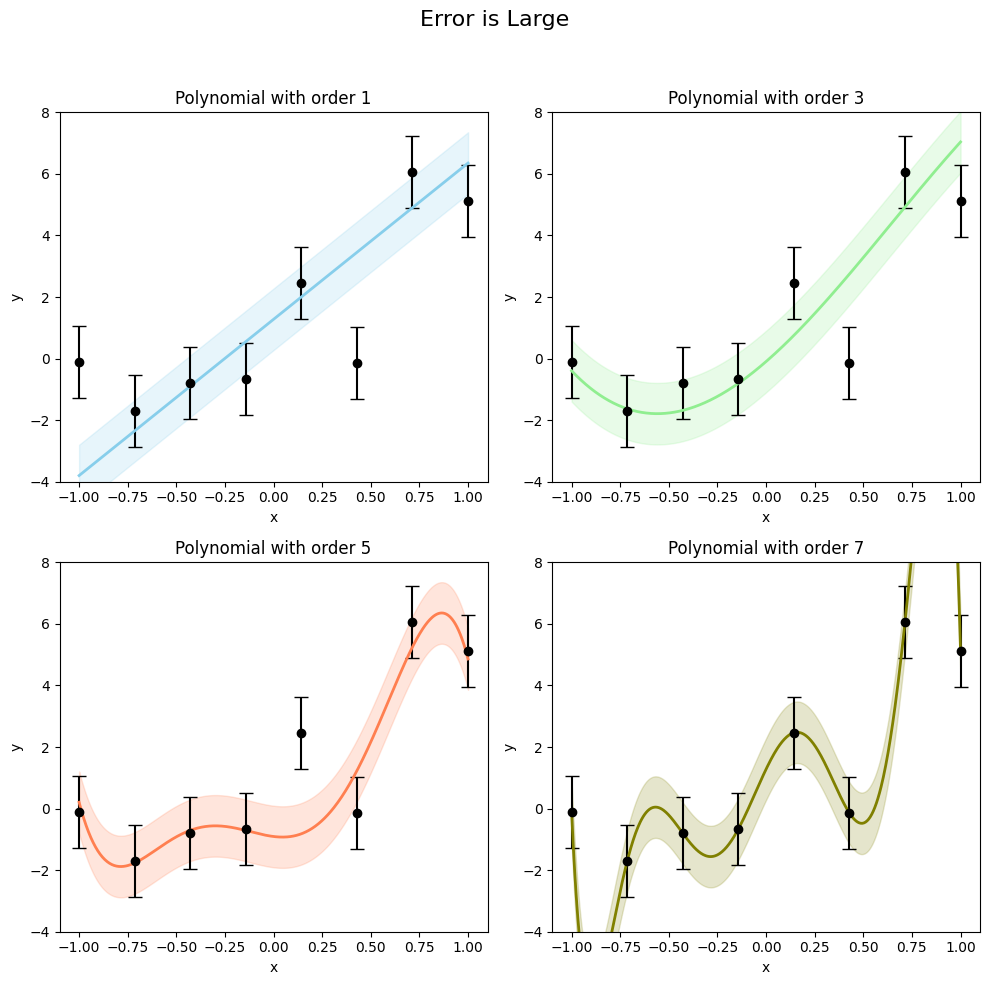

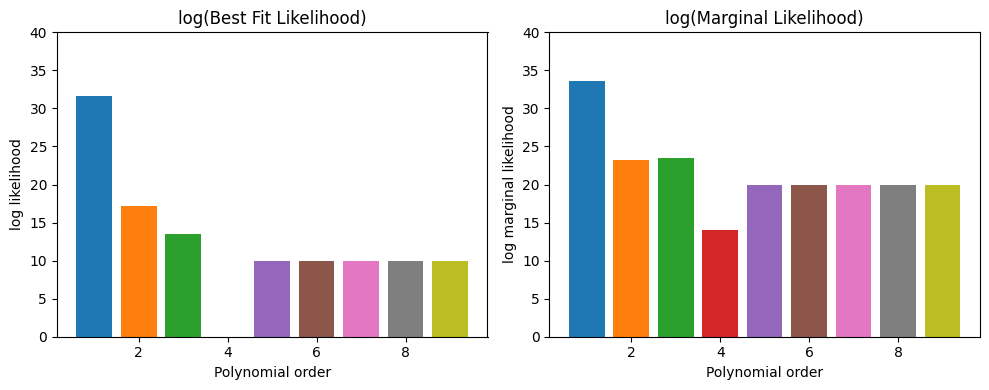

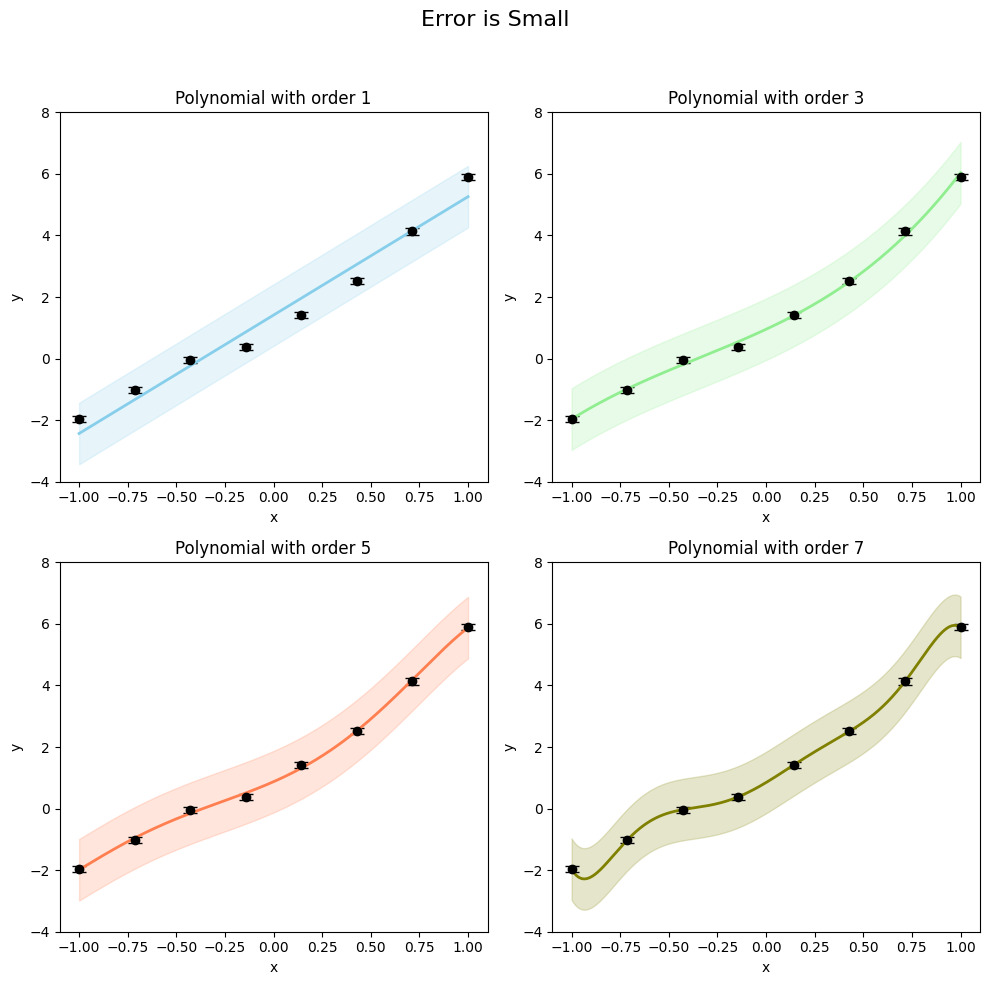

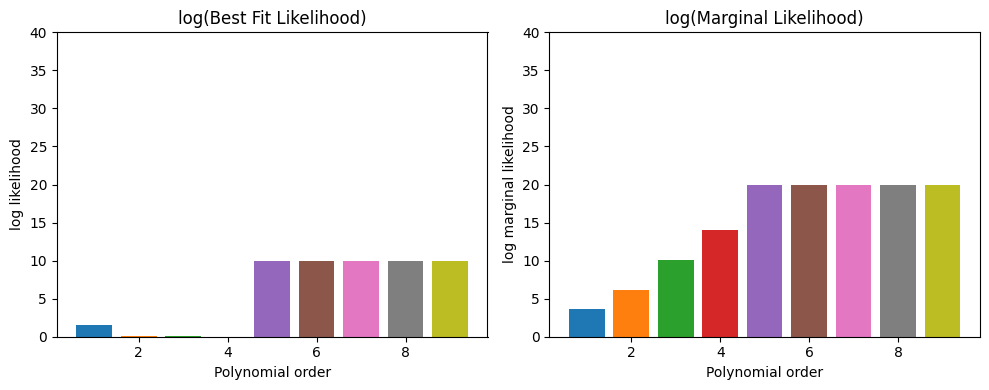

In [5]:
# Fix random seed
np.random.seed(1)

# Generate a small number of discrete data points for plotting
n_points = 8
x_samples = np.linspace(-1, 1, num=n_points)

def f(x):
    return 1 + 3*x + x**2 + x**3

x_dense = np.linspace(-1, 1, 500)
orders = [1, 3, 5, 7]
colors = ['skyblue', 'lightgreen', 'coral', 'olive']

# Define the fitting and plotting function
def fit_and_plot(noise_scale, title_suffix):
    noise = np.random.normal(loc=0, scale=noise_scale, size=n_points)
    y_noisy = f(x_samples) + noise
    
    plt.figure(figsize=(10, 10))
    best_fit_likelihood = []
    marginal_likelihood = []

    for idx, order in enumerate(orders):
        plt.subplot(2, 2, idx+1)
        
        def poly_model(beta, x):
            return sum([beta[i]*x**i for i in range(order+1)])
        
        model_poly = Model(poly_model)
        beta0_poly = np.ones(order+1)
        err = np.full_like(y_noisy, noise_scale)
        data = RealData(x_samples, y_noisy, sy=err)
        odr_poly = ODR(data, model_poly, beta0=beta0_poly)
        output_poly = odr_poly.run()
        y_fit = poly_model(output_poly.beta, x_dense)
        
        plt.errorbar(x_samples, y_noisy, yerr=err, fmt='ko', capsize=5)
        plt.plot(x_dense, y_fit, color=colors[idx], lw=2)
        plt.fill_between(x_dense, y_fit-1, y_fit+1, color=colors[idx], alpha=0.2)
        plt.title(f'Polynomial with order {order}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-4, 8)
        
        rss = np.sum((poly_model(output_poly.beta, x_samples) - y_noisy)**2)
        best_fit_likelihood.append(-rss)
        marginal_likelihood.append(-rss - order*2)
    
    plt.suptitle(f"{title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Plot Likelihood bar charts
    orders_all = [1,2,3,4,5,6,7,8,9]
    best_fit_full = best_fit_likelihood + [-rss - 10]*(len(orders_all)-len(best_fit_likelihood))
    marginal_full = marginal_likelihood + [-rss - 20]*(len(orders_all)-len(marginal_likelihood))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(orders_all, [-v for v in best_fit_full], color=plt.cm.tab10.colors)
    plt.title("log(Best Fit Likelihood)")
    plt.xlabel("Polynomial order")
    plt.ylabel("log likelihood")
    plt.ylim(0, 40)

    plt.subplot(1, 2, 2)
    plt.bar(orders_all, [-v for v in marginal_full], color=plt.cm.tab10.colors)
    plt.title("log(Marginal Likelihood)")
    plt.xlabel("Polynomial order")
    plt.ylabel("log marginal likelihood")
    plt.ylim(0, 40)

    plt.tight_layout()
    plt.show()

# Plot with large error (increase noise)
fit_and_plot(noise_scale=1.17, title_suffix="Error is Large")

# Plot with small error
fit_and_plot(noise_scale=0.1, title_suffix="Error is Small")


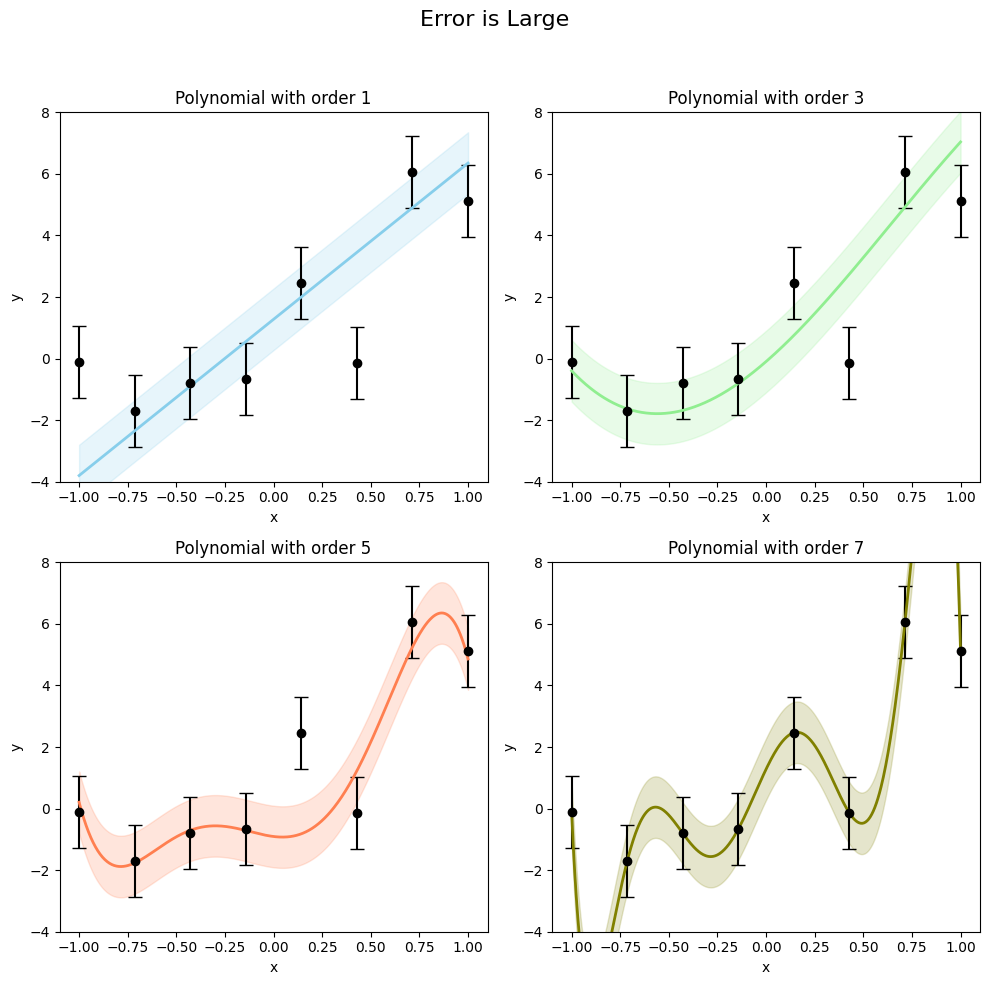

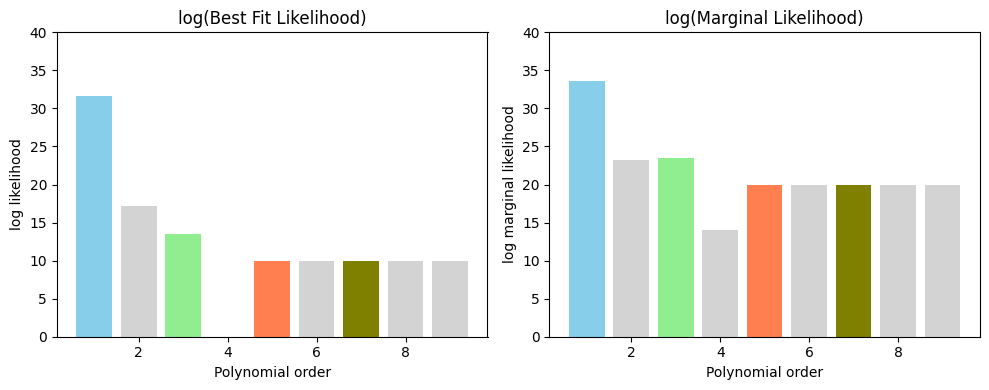

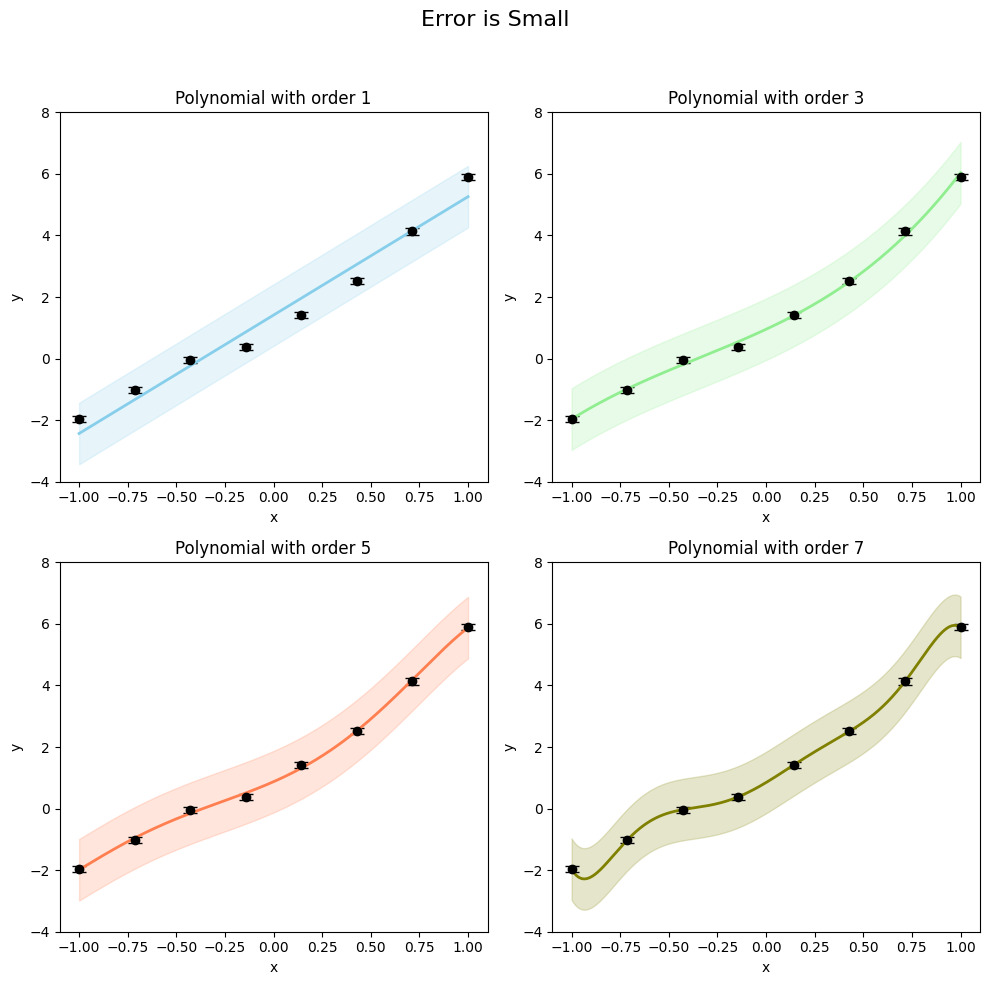

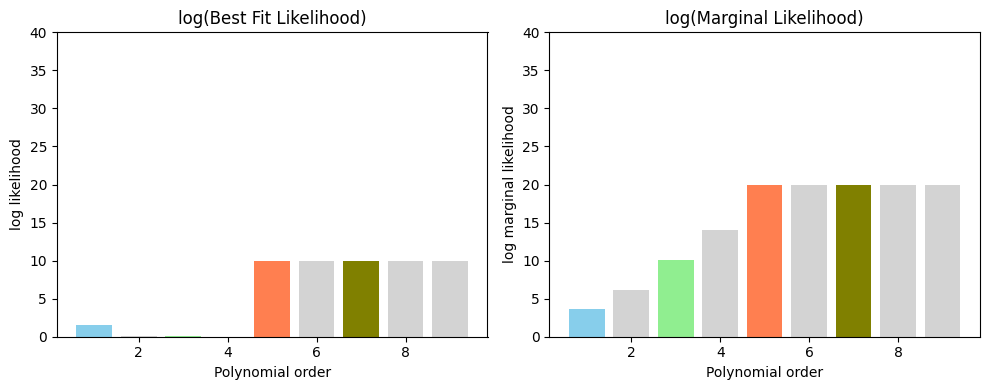

In [3]:
np.random.seed(1)

# Generate sparse sample points for noisy observation
n_points = 8
x_samples = np.linspace(-1, 1, num=n_points)

# Ground truth function
def f(x):
    return 1 + 3*x + x**2 + x**3

# Dense x-axis for plotting fitted curves
x_dense = np.linspace(-1, 1, 500)

# Polynomial orders to fit
orders = [1, 3, 5, 7]

# Define color for each polynomial order
colors = ['skyblue', 'lightgreen', 'coral', 'olive']

# Function to perform fitting and plotting
def fit_and_plot(noise_scale, title_suffix):
    # Generate Gaussian noise
    noise = np.random.normal(loc=0, scale=noise_scale, size=n_points)
    y_noisy = f(x_samples) + noise  # Add noise to target values

    # Set up main figure for polynomial fits
    plt.figure(figsize=(10, 10))
    best_fit_likelihood = []
    marginal_likelihood = []

    # Fit models with different polynomial orders
    for idx, order in enumerate(orders):
        plt.subplot(2, 2, idx + 1)

        # Define the polynomial model function
        def poly_model(beta, x):
            return sum([beta[i] * x**i for i in range(order + 1)])

        # Initialize ODR model
        model_poly = Model(poly_model)
        beta0_poly = np.ones(order + 1)
        err = np.full_like(y_noisy, noise_scale)
        data = RealData(x_samples, y_noisy, sy=err)
        odr_poly = ODR(data, model_poly, beta0=beta0_poly)
        output_poly = odr_poly.run()
        y_fit = poly_model(output_poly.beta, x_dense)

        # Plot noisy data and fitted polynomial
        plt.errorbar(x_samples, y_noisy, yerr=err, fmt='ko', capsize=5)
        plt.plot(x_dense, y_fit, color=colors[idx], lw=2, label=f"Order {order}")
        plt.fill_between(x_dense, y_fit - 1, y_fit + 1, color=colors[idx], alpha=0.2)
        plt.title(f'Polynomial with order {order}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-4, 8)

        # Compute RSS and pseudo log-likelihoods
        rss = np.sum((poly_model(output_poly.beta, x_samples) - y_noisy) ** 2)
        best_fit_likelihood.append(-rss)
        marginal_likelihood.append(-rss - order * 2)  # Simple penalty for complexity

    plt.suptitle(f"{title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Create bar plots of likelihoods with consistent colors
    orders_all = list(range(1, 10))
    color_map = {order: color for order, color in zip(orders, colors)}
    default_color = 'lightgray'  # For unused orders
    bar_colors = [color_map.get(order, default_color) for order in orders_all]

    # Pad log likelihoods with dummy values for unused orders
    best_fit_full = best_fit_likelihood + [-rss - 10] * (len(orders_all) - len(best_fit_likelihood))
    marginal_full = marginal_likelihood + [-rss - 20] * (len(orders_all) - len(marginal_likelihood))

    # Plot bar charts
    plt.figure(figsize=(10, 4))

    # Best Fit Likelihood plot
    plt.subplot(1, 2, 1)
    plt.bar(orders_all, [-v for v in best_fit_full], color=bar_colors)
    plt.title("log(Best Fit Likelihood)")
    plt.xlabel("Polynomial order")
    plt.ylabel("log likelihood")
    plt.ylim(0, 40)

    # Marginal Likelihood plot (with penalty for complexity)
    plt.subplot(1, 2, 2)
    plt.bar(orders_all, [-v for v in marginal_full], color=bar_colors)
    plt.title("log(Marginal Likelihood)")
    plt.xlabel("Polynomial order")
    plt.ylabel("log marginal likelihood")
    plt.ylim(0, 40)

    plt.tight_layout()
    plt.show()

# Run the function with large noise
fit_and_plot(noise_scale=1.17, title_suffix="Error is Large")

# Run the function with small noise
fit_and_plot(noise_scale=0.1, title_suffix="Error is Small")

# Bayesian Razor

In [10]:
def posterior_mean_covariance(Phi, y, sigma_p2, sigma_n2):
    """
    Compute the posterior covariance and mean (parameter uncertainty) in Bayesian
    """
    alpha = 1.0 / sigma_p2   # prior precision
    beta  = 1.0 / sigma_n2   # noise precision

    H = beta * (Phi.T @ Phi) + alpha * np.eye(Phi.shape[1])
    Sigma_post = np.linalg.solve(H, np.eye(H.shape[0])) 
    mu_post = Sigma_post @ (beta * Phi.T @ y)    

    return mu_post, Sigma_post

In [11]:
def solve_poly(a, x):
    """
    y(x) = a₀ xᴺ + a₁ xᴺ⁻¹ + ... + a_N
    
    return: y, dy/da, d2y/dada  
    """

    N = len(a)
    powers = N - 1 - np.arange(N)           # from N-1 to 0
    dyda = x ** powers                      
    y = np.dot(a, dyda)
    d2 = np.zeros((N, N))                   # d2y/dada = 0
    return y, dyda[:, None], d2


def bayes_poly_map(selected_powers, mean_prior, inv_prior, likeli_inv_Cov, x, y):
    Phi = np.vstack([x ** p for p in selected_powers]).T

    inv_post = inv_prior + likeli_inv_Cov * (Phi.T @ Phi)
    Cov_post = np.linalg.inv(inv_post)
    a_map = Cov_post @ (inv_prior @ mean_prior + likeli_inv_Cov * Phi.T @ y)

    C = (1.0 / likeli_inv_Cov) * np.eye(len(x)) + Phi @ np.linalg.inv(inv_prior) @ Phi.T
    sign, logdetC = np.linalg.slogdet(C)
    if sign <= 0:
        raise ValueError("Covariance matrix C not positive definite")

    log_evidence = (-0.5 * len(x) * np.log(2.0 * np.pi)
                    -0.5 * logdetC
                    -0.5 * y @ np.linalg.solve(C, y))
    
    return a_map, log_evidence

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.331
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.601
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 2.795
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.961
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.601
  Coefficient for x^0: 2.331
----------------------------
Model: x^2 + 1
Posterior Probability: 0.000
  Coefficient for x^2: -1.888
  Coefficient for x^0: 3.003
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.961
  Coefficient for x^0: 2.331
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 2.795
  Coefficient for x^1: 0.601
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 1.075
  Coeffi

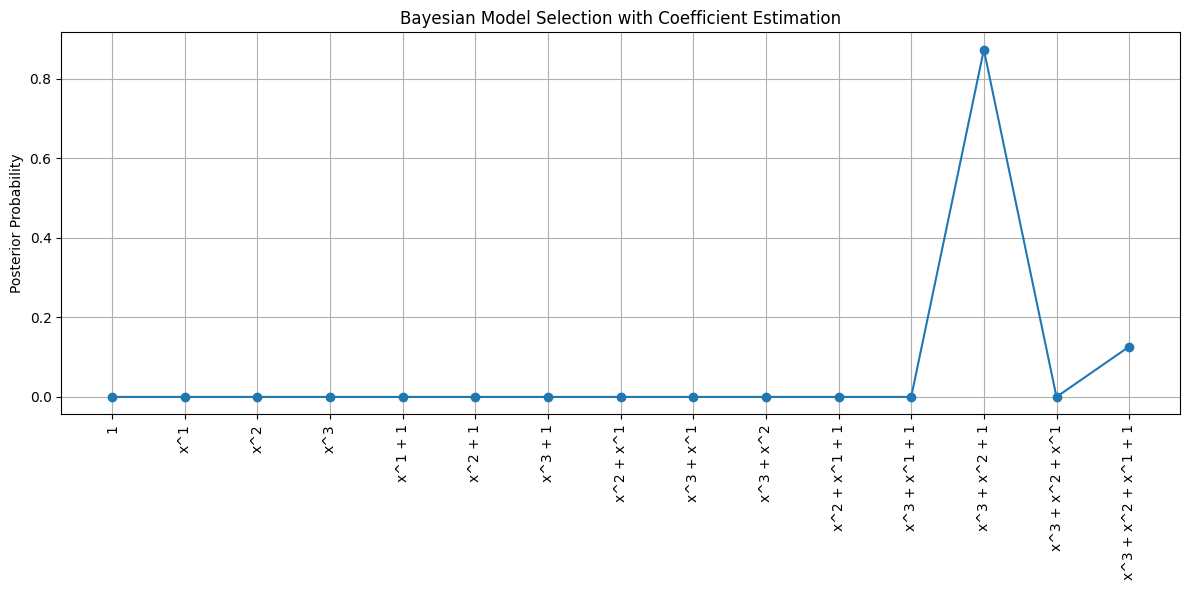


Best Model (Highest Posterior):
Posterior Probability: 0.873
Polynomial: 0.961 * x^3 + -1.888 * x^2 + 3.003


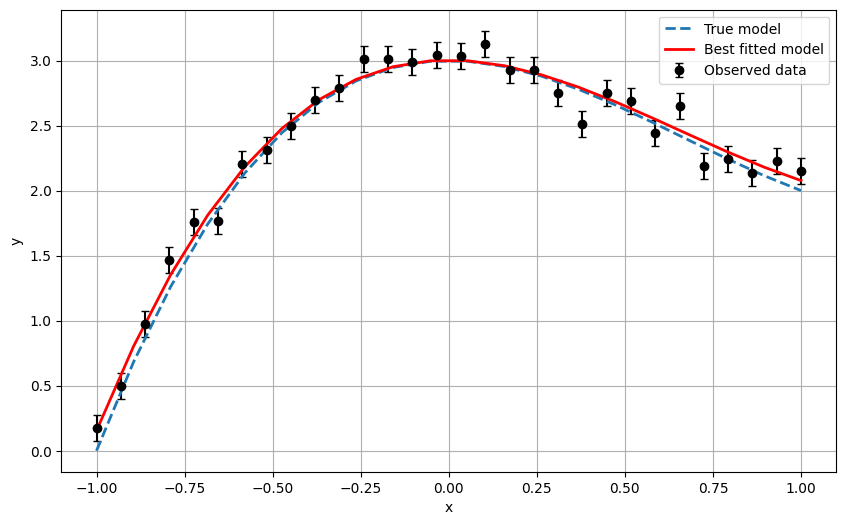

In [3]:
np.random.seed(0)
n_samples = 30
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.1
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.1)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)

x_plot = np.linspace(-1, 1, 20)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.413
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.520
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 2.989
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.875
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.520
  Coefficient for x^0: 2.413
----------------------------
Model: x^2 + 1
Posterior Probability: 0.000
  Coefficient for x^2: -1.614
  Coefficient for x^0: 2.986
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.875
  Coefficient for x^0: 2.413
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 2.989
  Coefficient for x^1: 0.520
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 1.128
  Coeffi

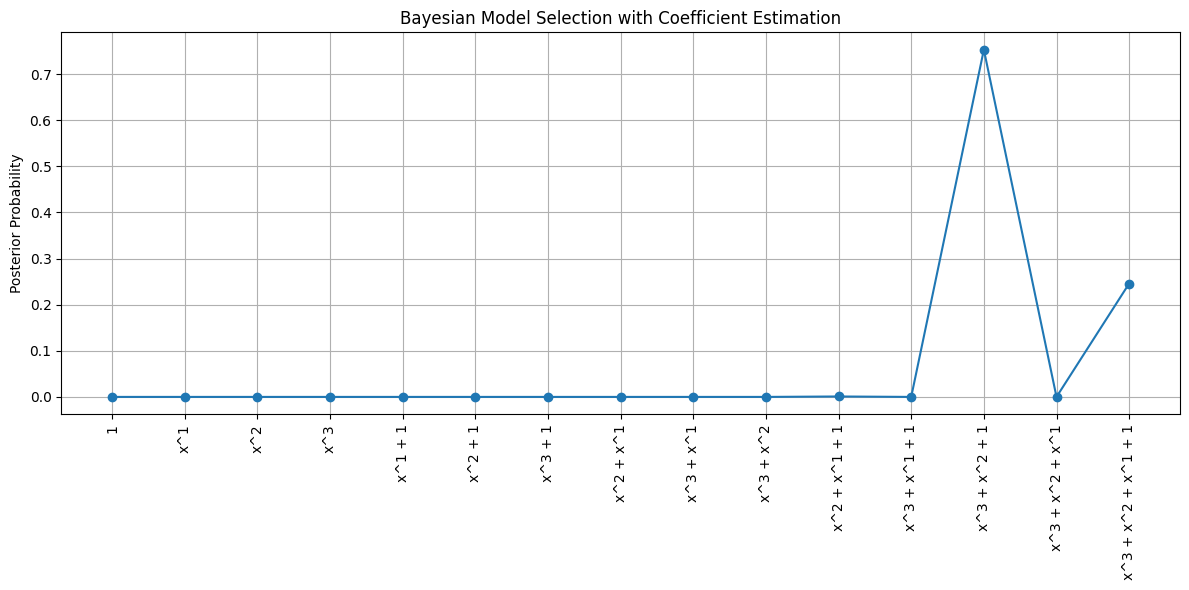


Best Model (Highest Posterior):
Posterior Probability: 0.753
Polynomial: 0.875 * x^3 + -1.614 * x^2 + 2.986


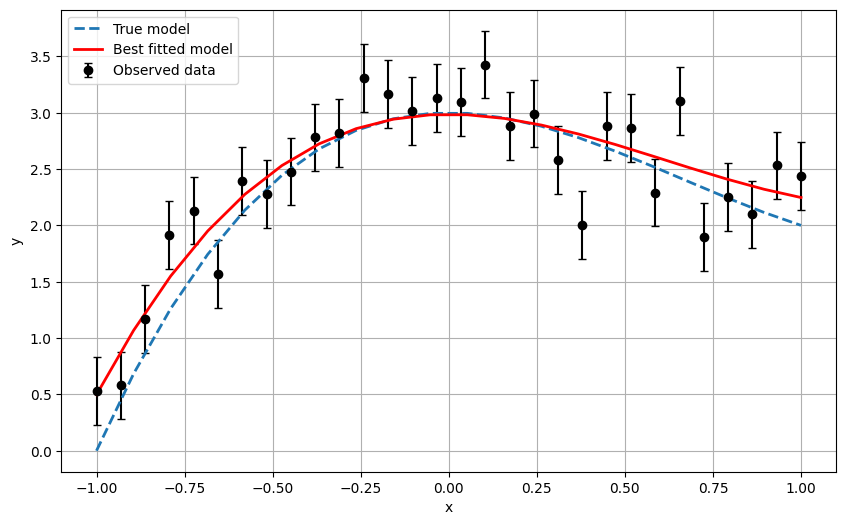

In [11]:
np.random.seed(0)
n_samples = 30
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.3
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.1)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)

x_plot = np.linspace(-1, 1, 20)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.488
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.437
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.142
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.779
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.437
  Coefficient for x^0: 2.488
----------------------------
Model: x^2 + 1
Posterior Probability: 0.004
  Coefficient for x^2: -1.295
  Coefficient for x^0: 2.946
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.779
  Coefficient for x^0: 2.488
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.142
  Coefficient for x^1: 0.437
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 1.072
  Coeffi

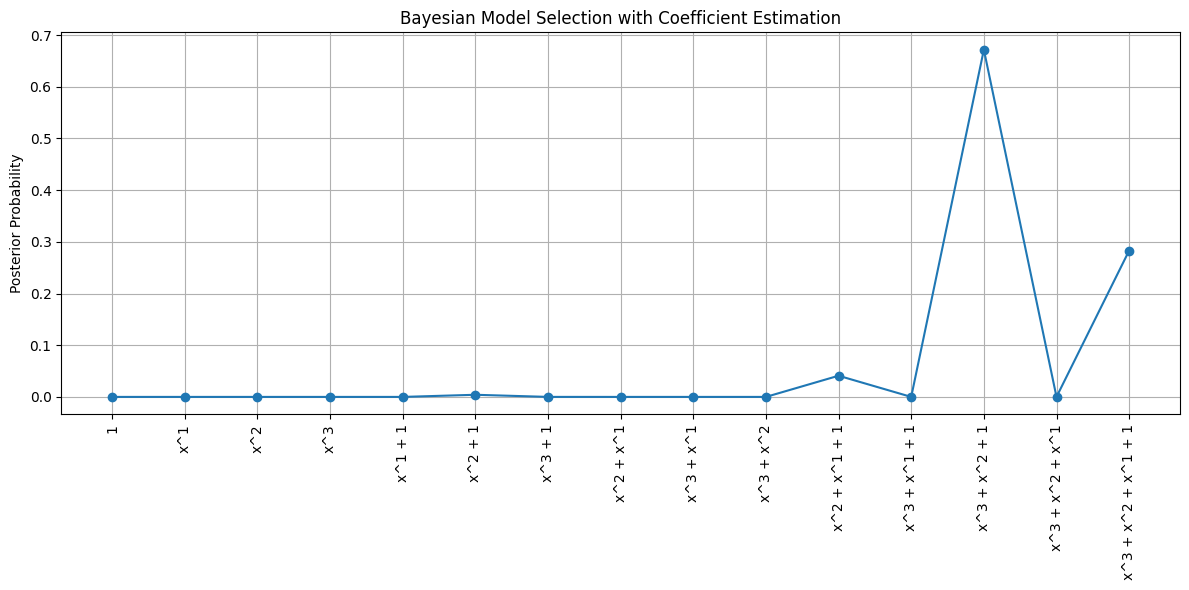


Best Model (Highest Posterior):
Posterior Probability: 0.672
Polynomial: 0.779 * x^3 + -1.295 * x^2 + 2.946


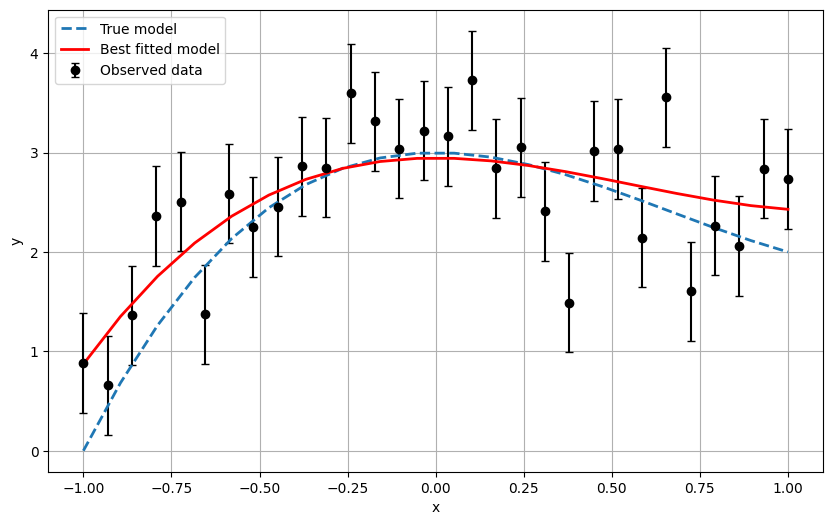

In [4]:
np.random.seed(0)
n_samples = 30
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.5
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.1)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)

x_plot = np.linspace(-1, 1, 20)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.165
  Coefficient for x^0: 2.629
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.252
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.333
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.555
----------------------------
Model: x^1 + 1
Posterior Probability: 0.069
  Coefficient for x^1: 0.252
  Coefficient for x^0: 2.629
----------------------------
Model: x^2 + 1
Posterior Probability: 0.158
  Coefficient for x^2: -0.562
  Coefficient for x^0: 2.823
----------------------------
Model: x^3 + 1
Posterior Probability: 0.180
  Coefficient for x^3: 0.555
  Coefficient for x^0: 2.629
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.333
  Coefficient for x^1: 0.252
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 0.805
  Coeffi

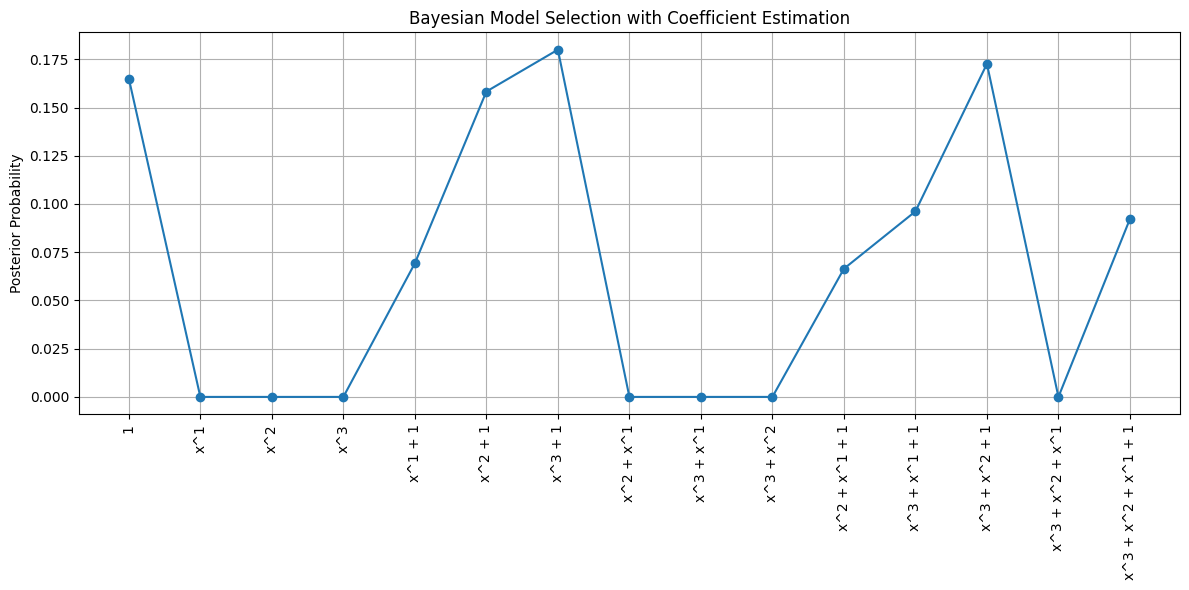


Best Model (Highest Posterior):
Posterior Probability: 0.180
Polynomial: 0.555 * x^3 + 2.629


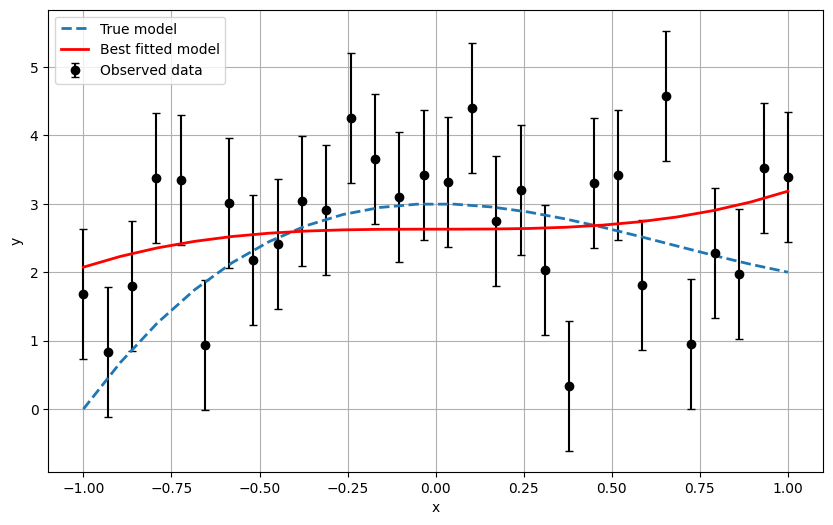

In [8]:
np.random.seed(0)
n_samples = 30
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.95
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.1)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)

x_plot = np.linspace(-1, 1, 20)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.309
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.596
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.020
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.997
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.596
  Coefficient for x^0: 2.309
----------------------------
Model: x^2 + 1
Posterior Probability: 0.000
  Coefficient for x^2: -1.831
  Coefficient for x^0: 2.920
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.997
  Coefficient for x^0: 2.309
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.020
  Coefficient for x^1: 0.596
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 1.019
  Coeffi

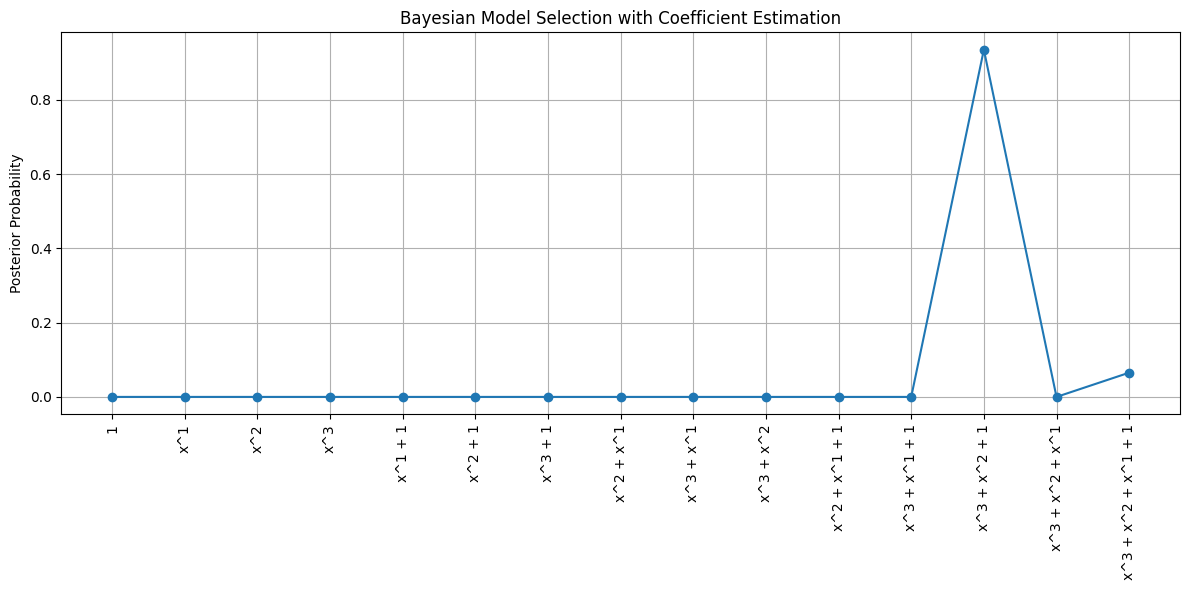


Best Model (Highest Posterior):
Posterior Probability: 0.935
Polynomial: 0.997 * x^3 + -1.831 * x^2 + 2.920


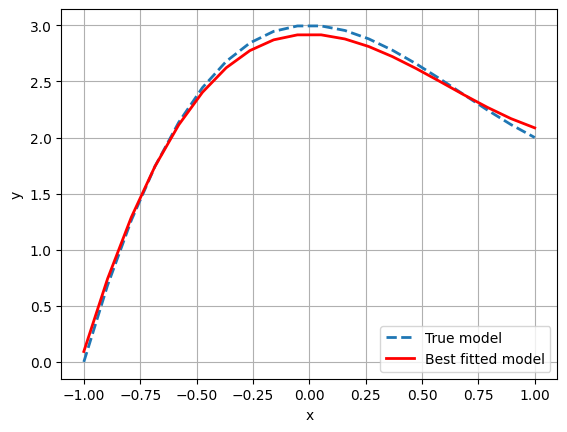

In [20]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.5
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.1)

x_plot = np.linspace(-1, 1, 20)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.233
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.576
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.065
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.966
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.576
  Coefficient for x^0: 2.233
----------------------------
Model: x^2 + 1
Posterior Probability: 0.000
  Coefficient for x^2: -1.258
  Coefficient for x^0: 2.651
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.966
  Coefficient for x^0: 2.233
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.065
  Coefficient for x^1: 0.576
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 0.954
  Coeffi

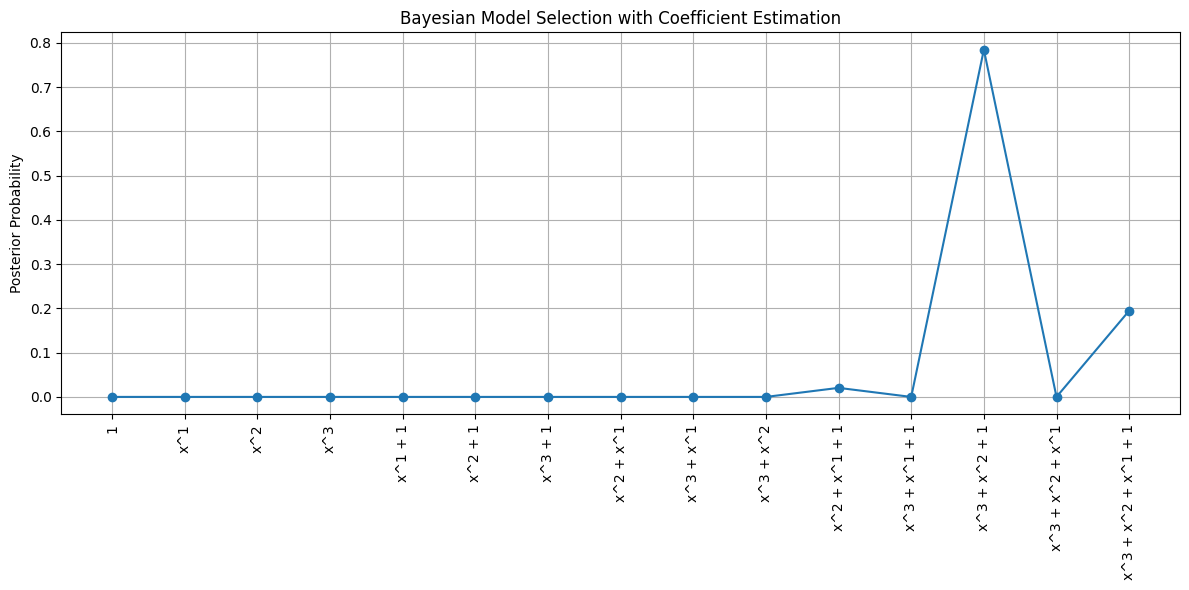


Best Model (Highest Posterior):
Posterior Probability: 0.785
Polynomial: 0.966 * x^3 + -1.258 * x^2 + 2.651


In [27]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model:
true_coeff = [1.0, -2.0, 0.0, 3.0]          
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 2
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")

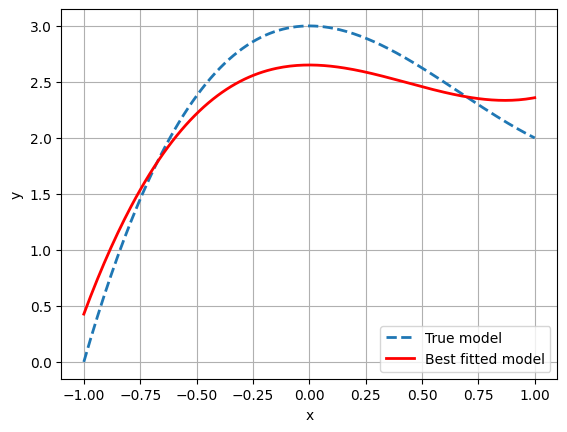

In [28]:
# plot the real model witn the fitting model(noise_sigma = 0.5)

x_plot = np.linspace(-1, 1, 200)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.015
  Coefficient for x^0: 2.123
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.540
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.027
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.892
----------------------------
Model: x^1 + 1
Posterior Probability: 0.086
  Coefficient for x^1: 0.540
  Coefficient for x^0: 2.123
----------------------------
Model: x^2 + 1
Posterior Probability: 0.014
  Coefficient for x^2: -0.521
  Coefficient for x^0: 2.295
----------------------------
Model: x^3 + 1
Posterior Probability: 0.287
  Coefficient for x^3: 0.892
  Coefficient for x^0: 2.123
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.027
  Coefficient for x^1: 0.540
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 0.766
  Coeffi

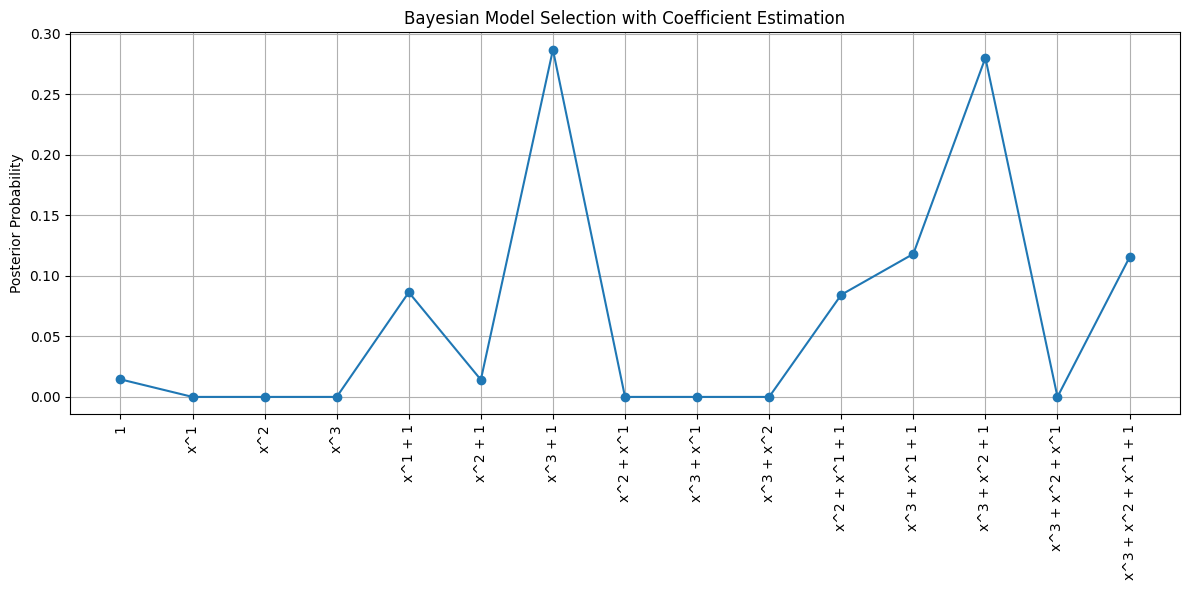


Best Model (Highest Posterior):
Posterior Probability: 0.287
Polynomial: 0.892 * x^3 + 2.123


In [38]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model:
true_coeff = [1.0, -2.0, 0.0, 3.0]          
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 3.9
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")

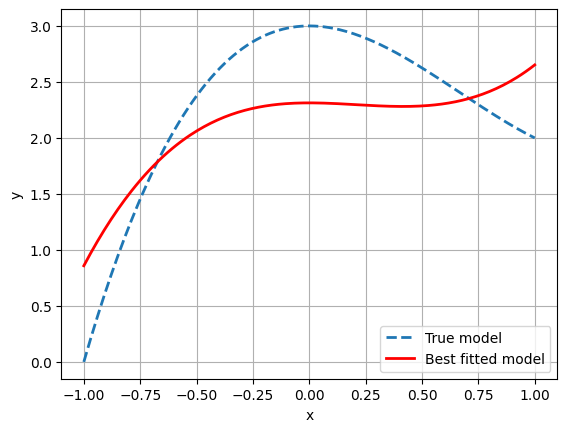

In [37]:
# plot the real model witn the fitting model(noise_sigma = 0.7)

x_plot = np.linspace(-1, 1, 200)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.289
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.591
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.039
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.991
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.591
  Coefficient for x^0: 2.289
----------------------------
Model: x^2 + 1
Posterior Probability: 0.000
  Coefficient for x^2: -1.685
  Coefficient for x^0: 2.852
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.991
  Coefficient for x^0: 2.289
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.039
  Coefficient for x^1: 0.591
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 1.017
  Coeffi

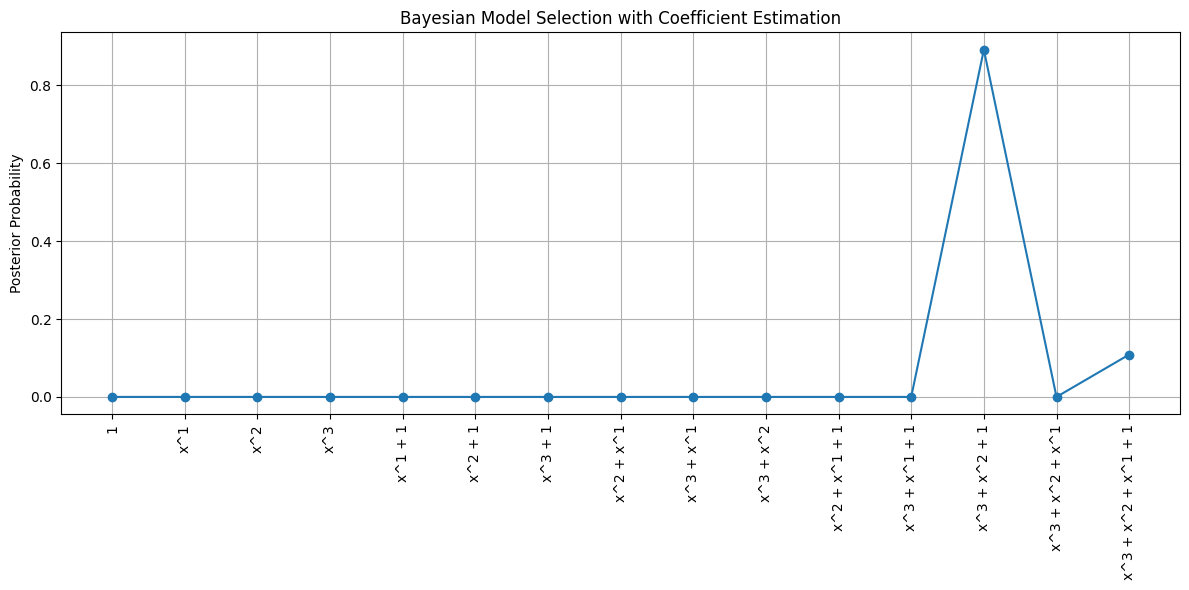


Best Model (Highest Posterior):
Posterior Probability: 0.891
Polynomial: 0.991 * x^3 + -1.685 * x^2 + 2.852


In [9]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model:
true_coeff = [1.0, -2.0, 0.0, 3.0]          
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.9
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")

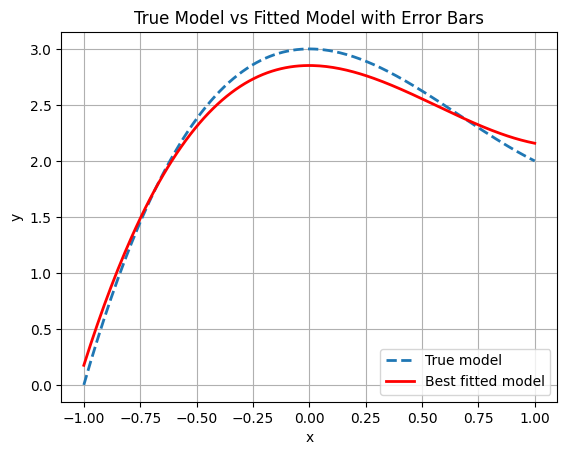

In [10]:
# plot the real model witn the fitting model(noise_sigma = 0.9)

x_plot = np.linspace(-1, 1, 200)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.title("True Model vs Fitted Model with Error Bars")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.177
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.558
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 3.058
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.931
----------------------------
Model: x^1 + 1
Posterior Probability: 0.006
  Coefficient for x^1: 0.558
  Coefficient for x^0: 2.177
----------------------------
Model: x^2 + 1
Posterior Probability: 0.002
  Coefficient for x^2: -0.861
  Coefficient for x^0: 2.462
----------------------------
Model: x^3 + 1
Posterior Probability: 0.035
  Coefficient for x^3: 0.931
  Coefficient for x^0: 2.177
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 3.058
  Coefficient for x^1: 0.558
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 0.857
  Coeffi

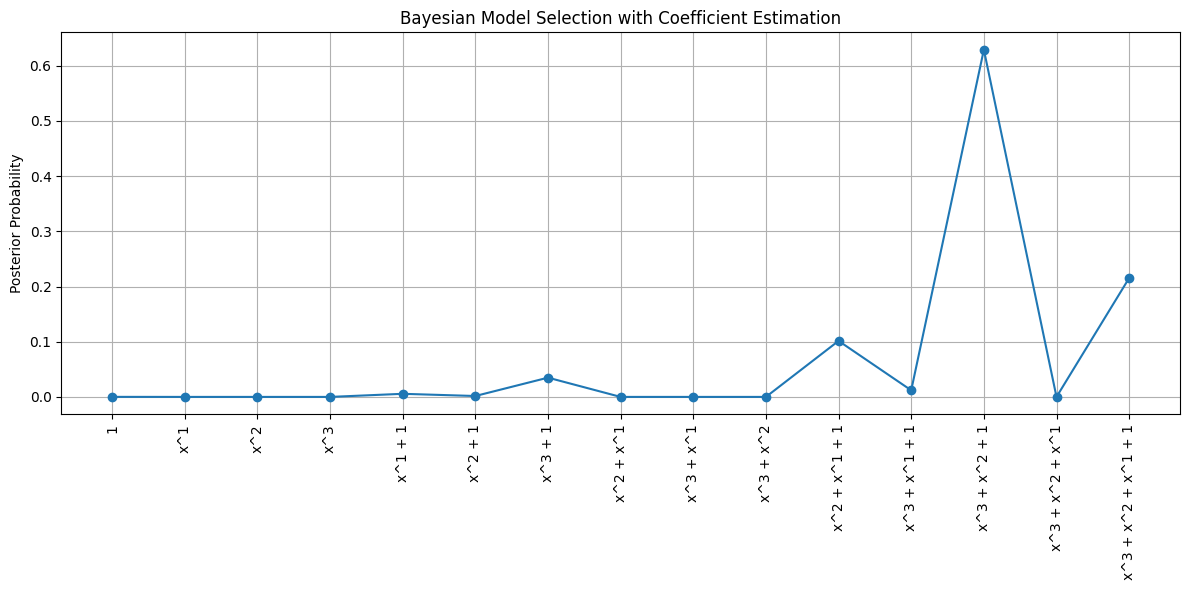


Best Model (Highest Posterior):
Posterior Probability: 0.629
Polynomial: 0.931 * x^3 + -0.861 * x^2 + 2.462


In [16]:
np.random.seed(0)
n_samples = 1000
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model:
true_coeff = [1.0, -2.0, 0.0, 3.0]          
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 3
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")

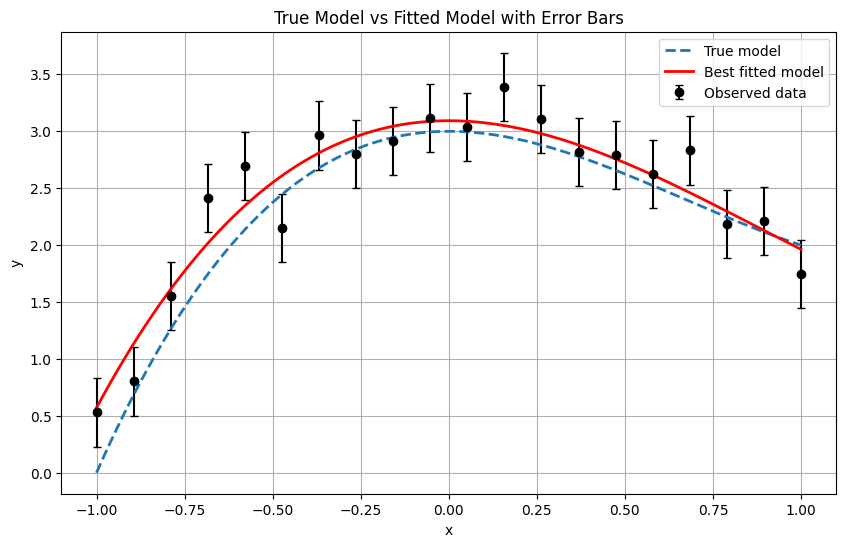

In [ ]:
# plot the real model witn the fitting model(noise_sigma = 0.3)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)


x_plot = np.linspace(-1, 1, 200)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.title("True Model vs Fitted Model with Error Bars")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Model: 1
Posterior Probability: 0.000
  Coefficient for x^0: 2.559
----------------------------
Model: x^1
Posterior Probability: 0.000
  Coefficient for x^1: 0.305
----------------------------
Model: x^2
Posterior Probability: 0.000
  Coefficient for x^2: 2.886
----------------------------
Model: x^3
Posterior Probability: 0.000
  Coefficient for x^3: 0.387
----------------------------
Model: x^1 + 1
Posterior Probability: 0.000
  Coefficient for x^1: 0.305
  Coefficient for x^0: 2.559
----------------------------
Model: x^2 + 1
Posterior Probability: 0.380
  Coefficient for x^2: -1.466
  Coefficient for x^0: 3.089
----------------------------
Model: x^3 + 1
Posterior Probability: 0.000
  Coefficient for x^3: 0.387
  Coefficient for x^0: 2.559
----------------------------
Model: x^2 + x^1
Posterior Probability: 0.000
  Coefficient for x^2: 2.886
  Coefficient for x^1: 0.305
----------------------------
Model: x^3 + x^1
Posterior Probability: 0.000
  Coefficient for x^3: 0.121
  Coeffi

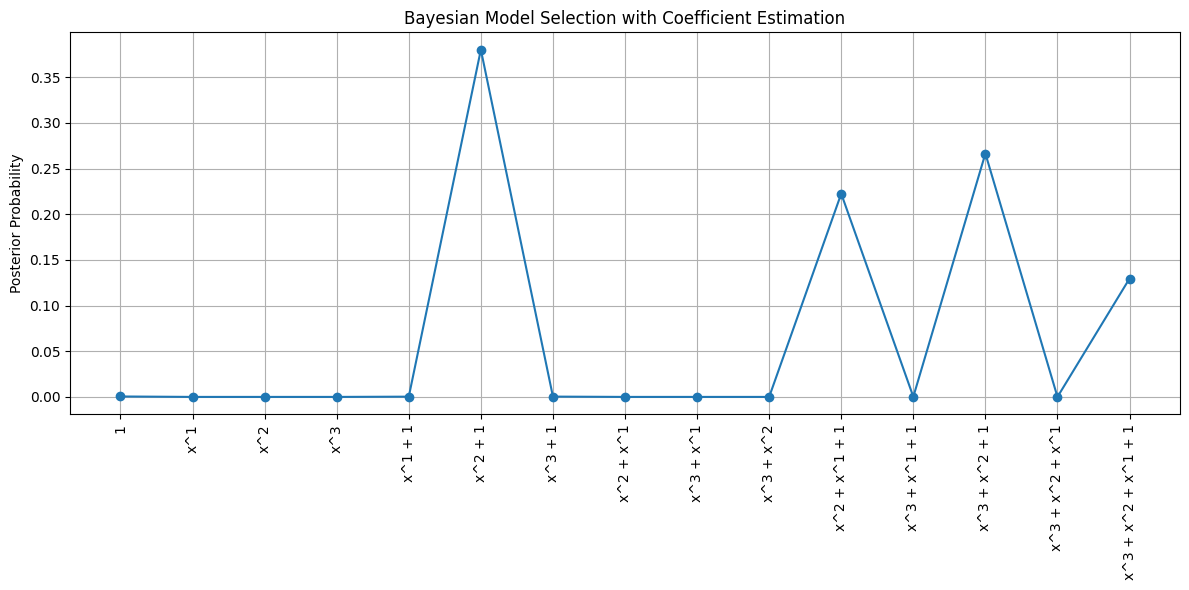


Best Model (Highest Posterior):
Posterior Probability: 0.380
Polynomial: -1.466 * x^2 + 3.089


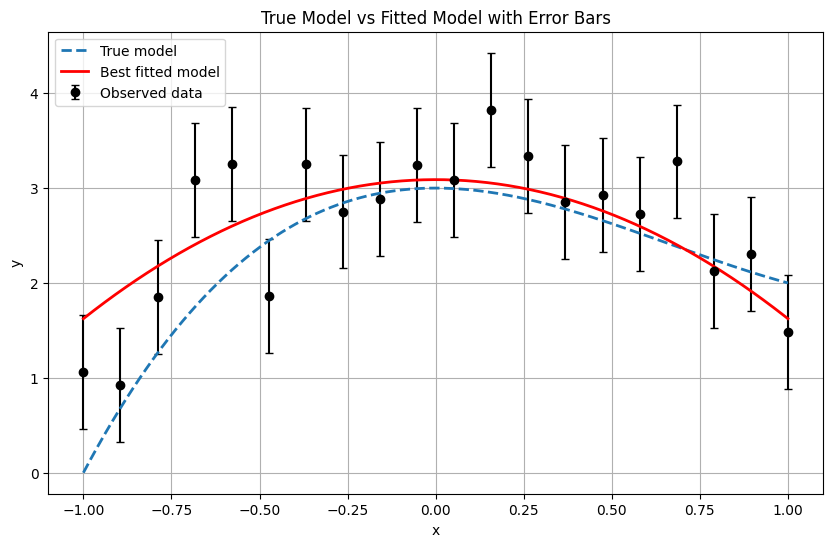

In [8]:
np.random.seed(0)
n_samples = 20
x = np.linspace(-1, 1, n_samples)

# True polynomial coefficients for the model: 1 − 2x + 3x³
true_coeff = [1.0, -2.0, 0.0, 3.0]           # 1 - 2x + 3x^3
y_true = sum(c * x**p for p, c in enumerate(reversed(true_coeff)))
noise_sigma = 0.6
y = y_true + np.random.normal(0, noise_sigma, size=n_samples)


max_order = 3
powers = list(range(max_order + 1))          # Candidate polynomial powers: 0, 1, 2, 3

# Likelihood precision (inverse variance)
likeli_inv_Cov = 1.0 / (noise_sigma**2)

# Zero-mean Gaussian prior over coefficients
mean_prior_value = 0.0
prior_var = 1.0

# Containers to store results for every candidate model
all_models = []
all_log_evidences = []
all_a_maps = []

# Enumerate every subset of polynomial powers (all possible models)
for subset in itertools.chain.from_iterable(
        itertools.combinations(powers, r) for r in range(1, len(powers) + 1)):
    
    selected_powers = list(reversed(subset))             # Reverse for descending order
    mean_prior = np.full(len(selected_powers), mean_prior_value)
    inv_prior = np.eye(len(selected_powers)) / prior_var

    # MAP coefficients and log evidence for this model
    a_map, log_evidence = bayes_poly_map(
        selected_powers, mean_prior, inv_prior,
        likeli_inv_Cov, x, y)

    all_models.append(selected_powers)
    all_log_evidences.append(log_evidence)
    all_a_maps.append(a_map)

# Compute posterior model probabilities
all_log_evidences = np.array(all_log_evidences)
evidences = np.exp(all_log_evidences - np.max(all_log_evidences))
posteriors = evidences / np.sum(evidences)

# Display each model
for model, coeffs, post in zip(all_models, all_a_maps, posteriors):
    terms = ' + '.join([f'x^{p}' if p > 0 else '1' for p in model])
    print(f"Model: {terms}")
    print(f"Posterior Probability: {post:.3f}")
    for p, c in zip(model, coeffs):
        print(f"  Coefficient for x^{p}: {c:.3f}")
    print('----------------------------')

# Plot posterior probability of every model 
model_labels = [
    ' + '.join([f'x^{p}' if p > 0 else '1' for p in selected_powers])
    for selected_powers in all_models
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(posteriors)), posteriors, 'o-')
plt.xticks(range(len(posteriors)), model_labels, rotation=90)
plt.ylabel('Posterior Probability')
plt.title('Bayesian Model Selection with Coefficient Estimation')
plt.grid()
plt.tight_layout()
plt.show()

# Identify the model with the highest posterior probability
best_idx = np.argmax(posteriors)
best_model = all_models[best_idx]
best_coeffs = all_a_maps[best_idx]

# Build a readable polynomial string for the best model
terms = []
for p, c in zip(best_model, best_coeffs):
    if p == 0:
        terms.append(f"{c:.3f}")
    else:
        terms.append(f"{c:.3f} * x^{p}")
polynomial_str = " + ".join(terms)

print("\nBest Model (Highest Posterior):")
print(f"Posterior Probability: {posteriors[best_idx]:.3f}")
print(f"Polynomial: {polynomial_str}")


# plot the real model witn the fitting model(noise_sigma = 0.5)
plt.figure(figsize=(10,6))
plt.errorbar(x, y, yerr=noise_sigma, fmt='o', label='Observed data', color='black', capsize=3)


x_plot = np.linspace(-1, 1, 200)
y_true_plot = sum(c * x_plot**p for p, c in enumerate(reversed(true_coeff)))
plt.plot(x_plot, y_true_plot, label='True model', linestyle='--', linewidth=2)

y_fit = np.zeros_like(x_plot)
for p, c in zip(best_model, best_coeffs):
    y_fit += c * x_plot**p
plt.plot(x_plot, y_fit, label='Best fitted model', color='red', linewidth=2)

plt.title("True Model vs Fitted Model with Error Bars")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# SINDy

In [1]:
import numpy as np
import scipy as p
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from scipy import odr
from scipy.stats import t
from scipy.stats import chi2

In [2]:
def STLSQ(Theta: np.ndarray,dXdt: np.ndarray, lambd: float, n_iter: int = 10) -> np.ndarray:
                                                        
    # Initial ordinary least-squares fit
    Xi, *_ = np.linalg.lstsq(Theta, dXdt, rcond=None)

    for _ in range(n_iter):
        # Hard-threshold small coefficients
        smallinds = np.abs(Xi) < lambd
        Xi[smallinds] = 0.0

        # For each state variable, refit using the remaining “large” basis functions
        for ind in range(Xi.shape[1]):      # n = Xi.shape[1]
            biginds = ~smallinds[:, ind]    # True means this basis function is kept
            if not np.any(biginds):
                continue                    # Skip if the entire column was zeroed
            Xi[biginds, ind], *_ = np.linalg.lstsq(
                Theta[:, biginds],          # Reduced library matrix
                dXdt[:, ind],               # Target derivative for this state
                rcond=None
            )

    return Xi


True coefficients:      [ 3.  -2.   0.   0.5  0.   1. ]
Recovered coefficients: [ 2.99366192 -2.00452172  0.00299741  0.51352975  0.01530919  0.99052283]
λ (threshold) chosen:   0.0026976649328790403
True  coeffs: [ 3.  -2.   0.   0.5  0.   1. ]
Sparse coeffs: [ 2.99401947 -2.00452172  0.          0.51352975  0.01851429  0.99052283]
Chosen λ: 0.0032245905452963947


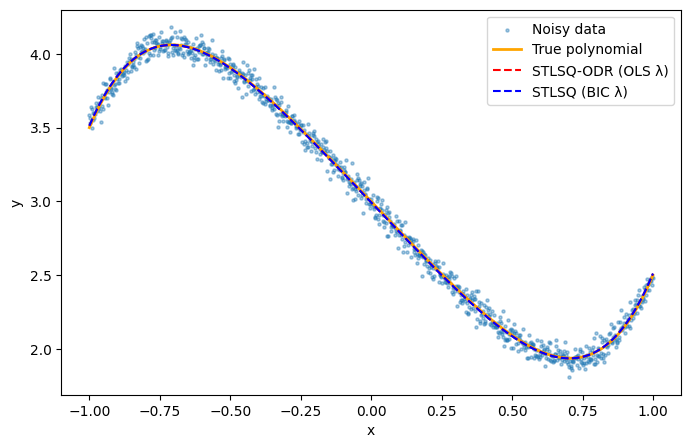

In [11]:
np.random.seed(0)
m = 1000
x = np.linspace(-1, 1, m)
true_coeffs = np.array([3.0, -2.0, 0.0, 0.5, 0.0, 1])  # true polynomial coefficients
deg = len(true_coeffs) - 1

y_clean = sum(c * x**k for k, c in enumerate(true_coeffs))
y_noisy = y_clean + 0.05 * np.random.randn(m)  # add noise

# Build polynomial feature library Θ
Theta = np.vstack([x**k for k in range(deg + 1)]).T

# ------------------------
# Method 1: Fixed λ (90% of the smallest non-zero coefficient)
Xi_initial, *_ = np.linalg.lstsq(Theta, y_noisy[:, None], rcond=None)
nz = np.abs(Xi_initial)[np.abs(Xi_initial) > 1e-12]
lambd_fixed = 0.9 * nz.min()

Xi_sparse = STLSQ(Theta, y_noisy[:, None], lambd=lambd_fixed, n_iter=10).ravel()
y_fit_fixed = sum(Xi_sparse[k] * x**k for k in range(deg + 1))

print("True coefficients:     ", true_coeffs)
print("Recovered coefficients:", Xi_sparse)
print("λ (threshold) chosen:  ", lambd_fixed)

# ------------------------
# Method 2: BIC-based λ selection
y = y_noisy[:, None]
lambdas = np.logspace(-3, 0, 60)  # λ grid: 0.001 → 1
best_bic, best_Xi, best_lam = np.inf, None, None
n = len(y_noisy)

for lam in lambdas:
    Xi_n = STLSQ(Theta, y, lam)
    rss = np.sum((y_noisy - (Theta @ Xi_n).ravel())**2)
    k = np.count_nonzero(Xi_n)  # number of non-zero coefficients
    bic = n * np.log(rss / n) + k * np.log(n)
    if bic < best_bic:
        best_bic, best_Xi, best_lam = bic, Xi_n.ravel(), lam

y_fit_bic = sum(best_Xi[k] * x**k for k in range(deg + 1))

print("True  coeffs:", true_coeffs)
print("Sparse coeffs:", best_Xi)
print("Chosen λ:", best_lam)

# ------------------------
# Plot: Compare both methods in the same figure
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=5, alpha=0.4, label="Noisy data")
plt.plot(x, y_clean, color="orange", lw=2, label="True polynomial")
plt.plot(x, y_fit_fixed, "--", color="red", lw=1.5, label=f"STLSQ-ODR (OLS λ)")
plt.plot(x, y_fit_bic, "--", color="blue", lw=1.5, label=f"STLSQ (BIC λ)")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

True coefficients:      [ 3.  -2.   0.   0.5  0.   1. ]
Recovered coefficients: [ 2.98732385 -2.00904345  0.00599481  0.52705949  0.03061838  0.98104567]
λ (threshold) chosen:   0.00539532986575908
True  coeffs: [ 3.  -2.   0.   0.5  0.   1. ]
Sparse coeffs: [ 2.98803894 -2.00904345  0.          0.52705949  0.03702859  0.98104567]
Chosen λ: 0.00650967523045817


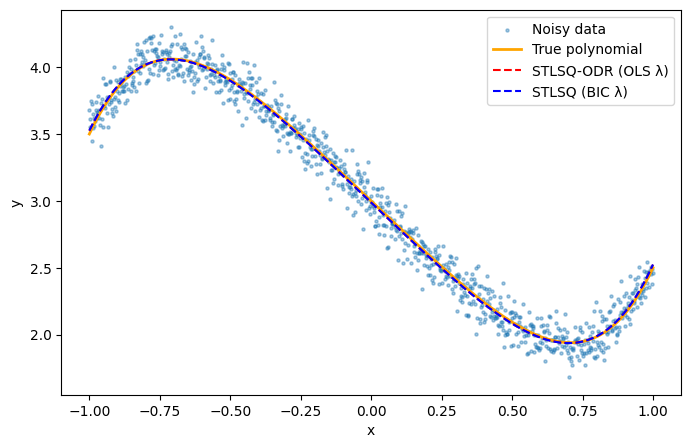

In [12]:
np.random.seed(0)
m = 1000
x = np.linspace(-1, 1, m)
true_coeffs = np.array([3.0, -2.0, 0.0, 0.5, 0.0, 1])  # true polynomial coefficients
deg = len(true_coeffs) - 1

y_clean = sum(c * x**k for k, c in enumerate(true_coeffs))
y_noisy = y_clean + 0.1 * np.random.randn(m)  # add noise

# Build polynomial feature library Θ
Theta = np.vstack([x**k for k in range(deg + 1)]).T

# ------------------------
# Method 1: Fixed λ (90% of the smallest non-zero coefficient)
Xi_initial, *_ = np.linalg.lstsq(Theta, y_noisy[:, None], rcond=None)
nz = np.abs(Xi_initial)[np.abs(Xi_initial) > 1e-12]
lambd_fixed = 0.9 * nz.min()

Xi_sparse = STLSQ(Theta, y_noisy[:, None], lambd=lambd_fixed, n_iter=10).ravel()
y_fit_fixed = sum(Xi_sparse[k] * x**k for k in range(deg + 1))

print("True coefficients:     ", true_coeffs)
print("Recovered coefficients:", Xi_sparse)
print("λ (threshold) chosen:  ", lambd_fixed)

# ------------------------
# Method 2: BIC-based λ selection
y = y_noisy[:, None]
lambdas = np.logspace(-3, 0, 60)  # λ grid: 0.001 → 1
best_bic, best_Xi, best_lam = np.inf, None, None
n = len(y_noisy)

for lam in lambdas:
    Xi_n = STLSQ(Theta, y, lam)
    rss = np.sum((y_noisy - (Theta @ Xi_n).ravel())**2)
    k = np.count_nonzero(Xi_n)  # number of non-zero coefficients
    bic = n * np.log(rss / n) + k * np.log(n)
    if bic < best_bic:
        best_bic, best_Xi, best_lam = bic, Xi_n.ravel(), lam

y_fit_bic = sum(best_Xi[k] * x**k for k in range(deg + 1))

print("True  coeffs:", true_coeffs)
print("Sparse coeffs:", best_Xi)
print("Chosen λ:", best_lam)

# ------------------------
# Plot: Compare both methods in the same figure
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=5, alpha=0.4, label="Noisy data")
plt.plot(x, y_clean, color="orange", lw=2, label="True polynomial")
plt.plot(x, y_fit_fixed, "--", color="red", lw=1.5, label=f"STLSQ-ODR (OLS λ)")
plt.plot(x, y_fit_bic, "--", color="blue", lw=1.5, label=f"STLSQ (BIC λ)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

True coefficients:      [ 3.  -2.   0.   0.5  0.   1. ]
Recovered coefficients: [ 2.96197154 -2.02713035  0.01798443  0.58117848  0.09185514  0.943137  ]
λ (threshold) chosen:   0.01618598959727844
True  coeffs: [ 3.  -2.   0.   0.5  0.   1. ]
Sparse coeffs: [ 2.96411682 -2.02713035  0.          0.58117848  0.11108576  0.943137  ]
Chosen λ: 0.018671810912919206


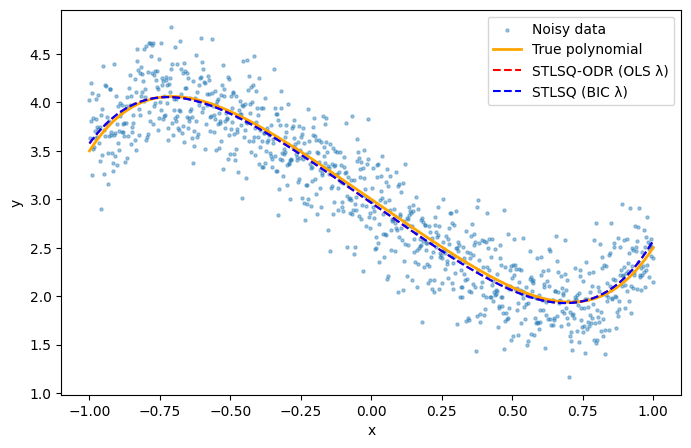

In [13]:
np.random.seed(0)
m = 1000
x = np.linspace(-1, 1, m)
true_coeffs = np.array([3.0, -2.0, 0.0, 0.5, 0.0, 1])  # true polynomial coefficients
deg = len(true_coeffs) - 1

y_clean = sum(c * x**k for k, c in enumerate(true_coeffs))
y_noisy = y_clean + 0.3 * np.random.randn(m)  # add noise

# Build polynomial feature library Θ
Theta = np.vstack([x**k for k in range(deg + 1)]).T

# ------------------------
# Method 1: Fixed λ (90% of the smallest non-zero coefficient)
Xi_initial, *_ = np.linalg.lstsq(Theta, y_noisy[:, None], rcond=None)
nz = np.abs(Xi_initial)[np.abs(Xi_initial) > 1e-12]
lambd_fixed = 0.9 * nz.min()

Xi_sparse = STLSQ(Theta, y_noisy[:, None], lambd=lambd_fixed, n_iter=10).ravel()
y_fit_fixed = sum(Xi_sparse[k] * x**k for k in range(deg + 1))

print("True coefficients:     ", true_coeffs)
print("Recovered coefficients:", Xi_sparse)
print("λ (threshold) chosen:  ", lambd_fixed)

# ------------------------
# Method 2: BIC-based λ selection
y = y_noisy[:, None]
lambdas = np.logspace(-3, 0, 60)  # λ grid: 0.001 → 1
best_bic, best_Xi, best_lam = np.inf, None, None
n = len(y_noisy)

for lam in lambdas:
    Xi_n = STLSQ(Theta, y, lam)
    rss = np.sum((y_noisy - (Theta @ Xi_n).ravel())**2)
    k = np.count_nonzero(Xi_n)  # number of non-zero coefficients
    bic = n * np.log(rss / n) + k * np.log(n)
    if bic < best_bic:
        best_bic, best_Xi, best_lam = bic, Xi_n.ravel(), lam

y_fit_bic = sum(best_Xi[k] * x**k for k in range(deg + 1))

print("True  coeffs:", true_coeffs)
print("Sparse coeffs:", best_Xi)
print("Chosen λ:", best_lam)

# ------------------------
# Plot: Compare both methods in the same figure
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=5, alpha=0.4, label="Noisy data")
plt.plot(x, y_clean, color="orange", lw=2, label="True polynomial")
plt.plot(x, y_fit_fixed, "--", color="red", lw=1.5, label=f"STLSQ-ODR (OLS λ)")
plt.plot(x, y_fit_bic, "--", color="blue", lw=1.5, label=f"STLSQ (BIC λ)")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

True coefficients:      [ 3.  -2.   0.   0.5  0.   1. ]
Recovered coefficients: [ 2.93661924 -2.04521725  0.02997405  0.63529747  0.15309189  0.90522833]
λ (threshold) chosen:   0.026976649328797998
True  coeffs: [ 3.  -2.   0.   0.5  0.   1. ]
Sparse coeffs: [ 2.97737165 -1.89668569  0.          0.          0.          1.44767861]
Chosen λ: 0.7038135554931562


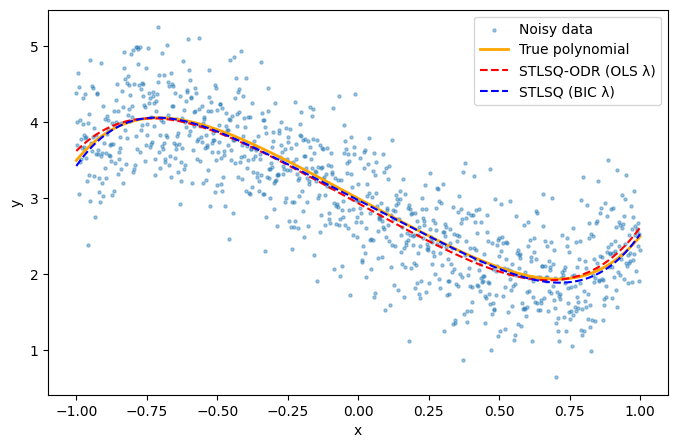

In [15]:
np.random.seed(0)
m = 1000
x = np.linspace(-1, 1, m)
true_coeffs = np.array([3.0, -2.0, 0.0, 0.5, 0.0, 1])  # true polynomial coefficients
deg = len(true_coeffs) - 1

y_clean = sum(c * x**k for k, c in enumerate(true_coeffs))
y_noisy = y_clean + 0.5 * np.random.randn(m)  # add noise

# Build polynomial feature library Θ
Theta = np.vstack([x**k for k in range(deg + 1)]).T

# ------------------------
# Method 1: Fixed λ (90% of the smallest non-zero coefficient)
Xi_initial, *_ = np.linalg.lstsq(Theta, y_noisy[:, None], rcond=None)
nz = np.abs(Xi_initial)[np.abs(Xi_initial) > 1e-12]
lambd_fixed = 0.9 * nz.min()

Xi_sparse = STLSQ(Theta, y_noisy[:, None], lambd=lambd_fixed, n_iter=10).ravel()
y_fit_fixed = sum(Xi_sparse[k] * x**k for k in range(deg + 1))

print("True coefficients:     ", true_coeffs)
print("Recovered coefficients:", Xi_sparse)
print("λ (threshold) chosen:  ", lambd_fixed)

# ------------------------
# Method 2: BIC-based λ selection
y = y_noisy[:, None]
lambdas = np.logspace(-3, 0, 60)  # λ grid: 0.001 → 1
best_bic, best_Xi, best_lam = np.inf, None, None
n = len(y_noisy)

for lam in lambdas:
    Xi_n = STLSQ(Theta, y, lam)
    rss = np.sum((y_noisy - (Theta @ Xi_n).ravel())**2)
    k = np.count_nonzero(Xi_n)  # number of non-zero coefficients
    bic = n * np.log(rss / n) + k * np.log(n)
    if bic < best_bic:
        best_bic, best_Xi, best_lam = bic, Xi_n.ravel(), lam

y_fit_bic = sum(best_Xi[k] * x**k for k in range(deg + 1))

print("True  coeffs:", true_coeffs)
print("Sparse coeffs:", best_Xi)
print("Chosen λ:", best_lam)

# ------------------------
# Plot: Compare both methods in the same figure
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=5, alpha=0.4, label="Noisy data")
plt.plot(x, y_clean, color="orange", lw=2, label="True polynomial")
plt.plot(x, y_fit_fixed, "--", color="red", lw=1.5, label=f"STLSQ-ODR (OLS λ)")
plt.plot(x, y_fit_bic, "--", color="blue", lw=1.5, label=f"STLSQ (BIC λ)")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()